In [4]:
Rw.<w> = PowerSeriesRing(QQ, default_prec=11)
Ru.<u> = PowerSeriesRing(Rw, default_prec=2400)

def B(X, cutoff):
    Y = (1/X).power_series() +O(u^cutoff)
    Y2 = Y^2 + O(u^cutoff)
    accu = bernoulli(2) * Y  / 2 
    YPow = Y
    for k in range(4, cutoff):
        if k%2==0:
            YPow = YPow * Y2 + O(u^cutoff)
            accu = accu + bernoulli(k) * YPow / (k*(k-1))
    return accu
    #return sum( bernoulli(k) * Y^(k-1)  / (k*(k-1)) for k in range(2, cutoff) if k%2 ==0 ) +O(u^cutoff)
def El(l):
    return sum(moebius(l/d)*u^(-d) for d in divisors(l) )/l
def lal(l):
    return u^l*(1-u^l)*l

def wt11Xl(l):
    return sum(moebius(l/d)*(1-w^d+O(w^11)) for d in divisors(l))/l

def logUl1(X, l, cutoff):
    return ( X*(log( (lal(l)*El(l)).power_series() +O(u^cutoff)) -1) +(-El(l)+X-1/2)*log((1-(X +O(u^(l+cutoff)) )/El(l)).power_series())).power_series()
def logUl2(X, l, cutoff):
    return B(-El(l)+X, cutoff)-B(-El(l), cutoff) 
def logUl2a(X, l, cutoff):
    return B(-El(l)+X, cutoff)
def logUlp1(l, cutoff):
    return logUl1(wt11Xl(l),l,cutoff)
def logUlp2(l, cutoff):
    return logUl2(wt11Xl(l),l,cutoff)
def logUlp2a(l, cutoff):
    return logUl2a(wt11Xl(l),l,cutoff)

def logUl(X, l, cutoff):
    return logUl1(X, l, cutoff) + logUl2(X, l, cutoff)
    #return ( X*(log( (lal(l)*El(l)).power_series() ) -1) +(-El(l)+X-1/2)*log((1-X/El(l)).power_series())).power_series()+B(-El(l)+X, cutoff)-B(-El(l), cutoff) 
def logUlp(l, cutoff):
    return logUlp1(l, cutoff) + logUlp2(l, cutoff)

def mindeg(X):
    return min([99999] + X.exponents())
def checkgrowth(maxl,cutoff):
    for l in range(1,maxl+1):
        print(l,": ", min([9999]+logUlp2(l,cutoff).exponents() ))


In [5]:
def preZ(cutoff):
    # need to go to twice the cutoff
    #return -u*(exp(sum(logUlp(l,cutoff) for l in range(1, 2*cutoff) ))-1)
    return -u*(exp(sum(logUlp1(l,cutoff) for l in range(1, 2*cutoff) ) + sum(logUlp2(l,cutoff) for l in range(1, cutoff/2) ))-1)
#def makeZ(Z):
#    return sum( u^exp * (c.truncate(11))(1) for exp, c in zip(Z.exponents(), Z.coefficients()) ) +O(u^(Z.prec()))
def makeZ(Z):
    return Z.map_coefficients(lambda c: (c.truncate(11))(1) )

def pickwcoeff(Z,j):
    return Z.map_coefficients( lambda c: c[j])
def bigZ(cutoff):
    return makeZ(preZ(cutoff))
def preZl(l, cutoff):
    return  exp(logUlp(l,cutoff))
def preZl2(l, cutoff):
    return  exp(logUlp2(l,cutoff))

In [1]:
def compSeries(s1,s2, roundto, fit_pow=false, fit_const = 0):
    accu = []
    for exp in range(min(s1.prec(), s2.prec())):
        c1 = s1[exp][0]
        c2 = s2[exp][0]
        
        if c1==0 and c2==0:
            print(exp, ":",1)
        elif c2==0:
            print(exp,":","+/- Inf")
        else:
            print(exp,":",round(c1/c2, roundto))
            if exp>20:
                accu.append([exp, c1/c2])
    # fit power law 
    if fit_pow:
        print("Fitting power law, even g")
        var("fit_exp fit_a")
        #model(x) = fit_const + fit_a * x^(-fit_exp)
        model(x) = fit_a -  fit_exp * x
        #ffe = find_fit([[g,a] for g,a in accu if g%2==0], model)
        ffe = find_fit([[log(g),log(abs(a-fit_const))] for g,a in accu if g%2==0], model)
        print(ffe)
        print("Fitting power law, even g")
        #ffo = find_fit([[g,a] for g,a in accu if g%2==1], model)
        ffo = find_fit([[log(g),log(abs(a-fit_const))] for g,a in accu if g%2==1], model)
        print(ffo)
        
def compSeries2(s1,s2, roundto):
    for exp in range(min(s1.prec(), s2.prec())):
        c1 = [s1[exp][j] for j in range(11)]
        c2 = s2[exp][0]
        
        if c2==0:
            print(exp,":","ref=0")
        else:
            print(exp,":",*[ round(cc/c2, roundto) for cc in c1] )

def asymp_Z(g):
    Cev = 1/factorial(10) * 1024 * pi^2 *(14175 - 4725 * pi^2 + 630 * pi^4 - 45 * pi^6 + 2 * pi^8)
    Codd = 4* pi / factorial(10) * 1280 *(2835 + 2 * pi^2 * (-945 + 189 * pi^2 - 18 * pi^4 + pi^6))
    return factorial(g-2) / (2*pi)^g * ((-1)^(g/2) * Cev if g%2==0 else (-1)^((g-1)/2)*Codd)

1.84577721656004e75

In [201]:
%time theZ_70 = bigZ(70)

CPU times: user 1min 8s, sys: 509 ms, total: 1min 9s
Wall time: 1min 9s


In [205]:
%time theZ_200 = bigZ(200)

CPU times: user 14min 47s, sys: 3 s, total: 14min 50s
Wall time: 14min 52s


In [209]:
%time theZ_400 = bigZ(400)

CPU times: user 1h 57min 45s, sys: 32.2 s, total: 1h 58min 18s
Wall time: 1h 58min 28s


In [323]:
%time theZ_600 = bigZ(600)

CPU times: user 6h 39min 10s, sys: 1min 45s, total: 6h 40min 55s
Wall time: 7h 52min 7s


In [183]:
%time theZ_40 = bigZ(40)

CPU times: user 27 s, sys: 80.2 ms, total: 27 s
Wall time: 27.1 s


In [181]:
%time theZ_30 = bigZ(30)

CPU times: user 18.1 s, sys: 26.9 ms, total: 18.1 s
Wall time: 18.1 s


In [175]:
logUlp1(80,100).prec()

100

In [198]:
compSeries(theZ_40, a2,4)

0 : 1
1 : 0.0
2 : 1
3 : 1
4 : 1
5 : 1
6 : 1
7 : 1
8 : 1
9 : +/- Inf
10 : +/- Inf
11 : +/- Inf
12 : 1
13 : 96.0
14 : -19.2756
15 : -2.8762
16 : -1.0854
17 : 0.5403
18 : 0.6494
19 : 0.6108
20 : 0.1962
21 : -0.2484
22 : -0.4937
23 : -0.7259
24 : -0.101
25 : 0.3385
26 : 2.5915
27 : 0.4494
28 : 0.7017
29 : 0.6334
30 : 0.7223
31 : 0.6948
32 : 0.6794
33 : 0.6831
34 : 0.7263
35 : 0.6963
36 : 0.7556
37 : 0.7089
38 : 0.7779
39 : 0.7196
40 : 0.7978


In [126]:
bb= logUlp2(50,80)

In [127]:
bb.prec()

80

In [58]:
theZ.prec()

2

In [48]:
a2[1]

-1

In [280]:
f12=tent_asymp(399)/theZ_400[399][0]

In [285]:
f12.n(digits=10)

-0.01731045250

In [230]:
def testBSeries(r, cutoff):
    return -bernoulli(r)* sum( (-1)^(r-1+j) * u^(r+j) * binomial(1-r, j) *sum( binomial(j,a)* (-1)^a for a in range(11) ) for j in range(11,cutoff)) /(r*(r-1))  +O(u^cutoff)

In [231]:
xxx = sum(testBSeries(r,40) for r in range(2,40))

In [265]:
lastn = 18
for r in range(30, 40):
    #cref = a2[r][0]
    cref = 11*bernoulli(r-12)*binomial(1-r+12,12)/(r-12)/(r-13) if r%2==0 else bernoulli(r-11)*binomial(1-r+11,11)/(r-11)/(r-12)
    cs = [testBSeries(r-10-k, 180)[r][0] for k in range(lastn)]
    print(r,":",*[round(a/cref,4) for a in cs])
    

30 : 0.0 0.0 1.0 0.0 -5.6398 0.0 9.7415 0.0 -8.1407 0.0 4.0203 0.0 -1.3157 0.0 0.3093 0.0 -0.0571 0.0
31 : 0.0 -1.0 0.0 16.7025 0.0 -47.6229 0.0 55.2989 0.0 -34.887 0.0 13.8561 0.0 -3.7954 0.0 0.7674 0.0 -0.1243
32 : 0.0 0.0 1.0 0.0 -5.6398 0.0 9.741 0.0 -8.1392 0.0 4.0173 0.0 -1.3117 0.0 0.3052 0.0 -0.0537 0.0
33 : 0.0 -1.0 0.0 16.7024 0.0 -47.6224 0.0 55.2964 0.0 -34.8806 0.0 13.8457 0.0 -3.7837 0.0 0.7574 0.0 -0.1169
34 : 0.0 0.0 1.0 0.0 -5.6398 0.0 9.7409 0.0 -8.1389 0.0 4.0166 0.0 -1.3107 0.0 0.3043 0.0 -0.053 0.0
35 : 0.0 -1.0 0.0 16.7024 0.0 -47.6223 0.0 55.2958 0.0 -34.879 0.0 13.8432 0.0 -3.7809 0.0 0.7551 0.0 -0.1154
36 : 0.0 0.0 1.0 0.0 -5.6398 0.0 9.7409 0.0 -8.1388 0.0 4.0164 0.0 -1.3105 0.0 0.3041 0.0 -0.0528 0.0
37 : 0.0 -1.0 0.0 16.7024 0.0 -47.6222 0.0 55.2956 0.0 -34.8786 0.0 13.8425 0.0 -3.7802 0.0 0.7545 0.0 -0.115
38 : 0.0 0.0 1.0 0.0 -5.6398 0.0 9.7409 0.0 -8.1388 0.0 4.0163 0.0 -1.3104 0.0 0.304 0.0 -0.0528 0.0
39 : 0.0 -1.0 0.0 16.7024 0.0 -47.6222 0.0 55.2956 0

In [416]:
def checkB(n):
    return round(bernoulli(2*n-2)/bernoulli(2*n),4)
def checkB2(n):
    return round(-bernoulli(2*n-2)*n^2/bernoulli(2*n)/pi^2,4)
def checkBa(n):
    return round( -(-1)^n*4*sqrt(pi*n) * (n/pi/e)^(2*n) /bernoulli(2*n),4)
def tent_asymp(g):
    return tent_asymp_noconst(g) * ( 32.3 if g%2 == 0 else 57.8 )
def tent_asymp_noconst(g):
    return factorial(g-2)/(2*pi)^g * (-1)^(g*(g-1)/2) 

In [312]:
for g in range(300,400):
    cref = theZ_400[g][0]
    print(g,":",(cref/tent_asymp(g)).n(digits=10))

300 : 0.9988803254
301 : 0.9891111402
302 : 0.9989087130
303 : 0.9893872891
304 : 0.9989363974
305 : 0.9896599178
306 : 0.9989633988
307 : 0.9899290930
308 : 0.9989897365
309 : 0.9901948798
310 : 0.9990154293
311 : 0.9904573418
312 : 0.9990404953
313 : 0.9907165409
314 : 0.9990649520
315 : 0.9909725374
316 : 0.9990888162
317 : 0.9912253904
318 : 0.9991121045
319 : 0.9914751572
320 : 0.9991348325
321 : 0.9917218939
322 : 0.9991570156
323 : 0.9919656553
324 : 0.9991786688
325 : 0.9922064949
326 : 0.9991998062
327 : 0.9924444647
328 : 0.9992204417
329 : 0.9926796158
330 : 0.9992405890
331 : 0.9929119978
332 : 0.9992602608
333 : 0.9931416593
334 : 0.9992794699
335 : 0.9933686477
336 : 0.9992982285
337 : 0.9935930095
338 : 0.9993165484
339 : 0.9938147898
340 : 0.9993344411
341 : 0.9940340330
342 : 0.9993519176
343 : 0.9942507822
344 : 0.9993689888
345 : 0.9944650798
346 : 0.9993856652
347 : 0.9946769671
348 : 0.9994019567
349 : 0.9948864844
350 : 0.9994178734
351 : 0.9950936712
352 : 0.9994

In [3]:
theZ_2400 = load("data/theZ_2400.sobj")

AssertionError: <class 'sage.rings.infinity.InfinityRing_class_with_category'> is not a direct subclass of <class 'sage.misc.fast_methods.Singleton'>

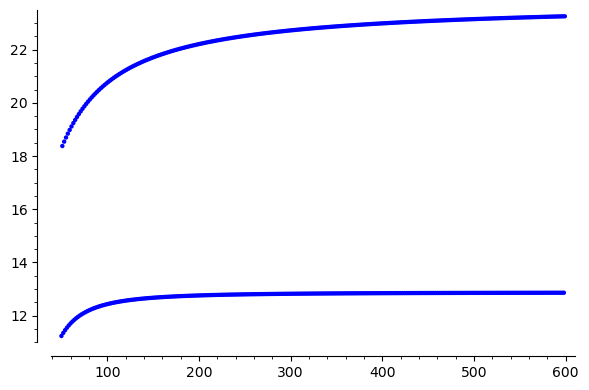

In [422]:
list_plot([(g, (theZ_600[g][0]/tent_asymp_noconst(g)).n(digits=10) ) for g in range(50,600) ])

In [319]:
lppp.save_image("data/ECrelplot.png")

In [351]:
# other formulas for makeZ(-u* logUlp2(1,cutoff))
def altB1(cutoff):
    return sum((-u)^k * 
               sum( bernoulli(k-j)*(-1)^j*factorial(k-2)/( factorial(k-j) * j * factorial(j-11) * factorial(10))
                   for j in range(11,k-1)) 
               for k in range(13,cutoff)) + O(u^cutoff)
def altB1b(cutoff):
    return sum(bernoulli(r)/r/(r-1) * (-u)^r *
               sum( binomial(1-r, j) * (-u)^j * binomial(j-1,10)
               for j in range(11,cutoff))
        for r in range(2,cutoff)) + O(u^cutoff)

In [350]:
altB1(30)

1/12*u^13 + 11/12*u^14 + 317/60*u^15 + 7579/360*u^16 + 261/4*u^17 + 6149/36*u^18 + 36583/90*u^19 + 770627/840*u^20 + 633497/330*u^21 + 298129/84*u^22 + 682571/110*u^23 + 9356341/720*u^24 + 3561787/130*u^25 + 1686383/84*u^26 - 159027835/3276*u^27 + 34526059/108*u^28 + 831977513/420*u^29 + O(u^30)

In [346]:
altB1b(30)

1/12*u^13 + 11/12*u^14 + 317/60*u^15 + 7579/360*u^16 + 261/4*u^17 + 6149/36*u^18 + 36583/90*u^19 + 770627/840*u^20 + 633497/330*u^21 + 298129/84*u^22 + 682571/110*u^23 + 9356341/720*u^24 + 3561787/130*u^25 + 1686383/84*u^26 - 159027835/3276*u^27 + 34526059/108*u^28 + 831977513/420*u^29 + O(u^30)

In [340]:
makeZ(-u* logUlp2(1,30))

1/12*u^13 + 11/12*u^14 + 317/60*u^15 + 7579/360*u^16 + 261/4*u^17 + 6149/36*u^18 + 36583/90*u^19 + 770627/840*u^20 + 633497/330*u^21 + 298129/84*u^22 + 682571/110*u^23 + 9356341/720*u^24 + 3561787/130*u^25 + 1686383/84*u^26 - 159027835/3276*u^27 + 34526059/108*u^28 + 831977513/420*u^29 - 50983709/12*u^30 + O(u^31)

In [356]:
s1test = makeZ(exp(logUlp2(1,80))-1)
s2test = makeZ(-u*logUlp2(1,200))

In [359]:
s3test = makeZ(logUlp2(1,60)^2)

In [360]:
compSeries(s3test, s2test, 4)

0 : 1
1 : 1
2 : 1
3 : 1
4 : 1
5 : 1
6 : 1
7 : 1
8 : 1
9 : 1
10 : 1
11 : 1
12 : 0.0
13 : -0.0758
14 : -0.159
15 : -0.255
16 : -0.3674
17 : -0.4911
18 : -0.6044
19 : -0.6882
20 : -0.7684
21 : -0.9016
22 : -1.0451
23 : -0.9499
24 : -0.8266
25 : -2.0518
26 : 1.4476
27 : -0.3129
28 : -0.081
29 : 0.1192
30 : 0.0209
31 : 0.0354
32 : 0.0059
33 : 0.0373
34 : 0.0056
35 : 0.032
36 : 0.0044
37 : 0.0281
38 : 0.0036
39 : 0.0249
40 : 0.003
41 : 0.0222
42 : 0.0025
43 : 0.0199
44 : 0.0021
45 : 0.0179
46 : 0.0018
47 : 0.0162
48 : 0.0015
49 : 0.0148
50 : 0.0013
51 : 0.0135
52 : 0.0011
53 : 0.0124
54 : 0.001
55 : 0.0114
56 : 0.0009
57 : 0.0105
58 : 0.0008
59 : 0.0097
60 : 0.0007
61 : 0.009


In [361]:
s2test

-1/12*u^12 - 11/12*u^13 - 317/60*u^14 - 7579/360*u^15 - 261/4*u^16 - 6149/36*u^17 - 36583/90*u^18 - 770627/840*u^19 - 633497/330*u^20 - 298129/84*u^21 - 682571/110*u^22 - 9356341/720*u^23 - 3561787/130*u^24 - 1686383/84*u^25 + 159027835/3276*u^26 - 34526059/108*u^27 - 831977513/420*u^28 + 50983709/12*u^29 + 74598063589/1980*u^30 - 242820755703/2464*u^31 - 19176680124881/21420*u^32 + 2277027211793/924*u^33 + 42713677383233/1785*u^34 - 176562416780251/2520*u^35 - 24053085890253553/33345*u^36 + 813951591653825/364*u^37 + 145662320440717279/5985*u^38 - 5217918755069782103/65520*u^39 - 5276228600989347593/5775*u^40 + 8723313461818044149/2772*u^41 + 105208044544929895255/2772*u^42 - 4804295463718868067/35*u^43 - 8302254789869471061155507/4781700*u^44 + 24866511304701795148943/3780*u^45 + 841194282178467834863191/9660*u^46 - 36217875151868899656751/105*u^47 - 1327938484743914152217008447/278460*u^48 + 12807153976426409403817019777/649740*u^49 + 18282739462986193384781496689/64350*u^50 - 16469

In [362]:
s3test

5/72*u^13 + 121/144*u^14 + 773/144*u^15 + 5753/240*u^16 + 6341087/75600*u^17 + 37143887/151200*u^18 + 31818439/50400*u^19 + 223022393/151200*u^20 + 111765522017/34927200*u^21 + 420244517/64800*u^22 + 4852389007/393120*u^23 + 2804589134801/123832800*u^24 + 17350406419/421200*u^25 + 4351043469989/61916400*u^26 + 6478577044417/64774080*u^27 + 17325311265541/107956800*u^28 + 907016301609479/1790712000*u^29 + 1066137934915044433/1353778272000*u^30 - 26226553364179691/7520990400*u^31 - 359519539972789267/67688913600*u^32 + 258119415437470246601/2810970162000*u^33 + 2726777061182595476381/20238985166400*u^34 - 22442023235180368769/10021284000*u^35 - 124099993727308314071/38821582800*u^36 + 5676927000662943304129/90191556000*u^37 + 94930294147224004426253/1082298672000*u^38 - 9016695889720599019598861/4542806268000*u^39 - 22558000089954702851774689/8328478158000*u^40 + 25743413752072642051460334449/368316754344000*u^41 + 4931836768635331595896984235581/52669295871192000*u^42 - 6710218476810882

In [368]:
s2test = makeZ(-u*logUlp2(1,400))

In [383]:
s3test = makeZ(-u*logUlp(2,400))

In [384]:
u3_term = makeZ(-u*logUlp(3,400))

In [404]:
logUlp1(2,5)

(-1/2*w + 1/2*w^2 + O(w^11))*u + (-1/4*w + 1/2*w^3 - 1/4*w^4 + O(w^11))*u^2 + (1/3*w - 7/12*w^2 + 1/2*w^3 - 1/4*w^4 + O(w^11))*u^3 + (1/8*w - 1/8*w^2 - 1/12*w^3 + 1/4*w^4 - 1/4*w^5 + 1/12*w^6 + O(w^11))*u^4 + O(u^5)

In [405]:
logUlp1(1,5)

(-1 + 3/2*w - 1/2*w^2 + O(w^11))*u + (-5/12 + 1/2*w - 1/4*w^2 + 1/6*w^3 + O(w^11))*u^2 + (-1/4 + 1/6*w + 1/6*w^3 - 1/12*w^4 + O(w^11))*u^3 + (-7/40 + 1/4*w^2 - 1/8*w^4 + 1/20*w^5 + O(w^11))*u^4 + O(u^5)

In [406]:
logUlp1(4,5)

(-1/4*w^2 + 1/4*w^4 + O(w^11))*u^2 + (1/8*w^2 - 1/4*w^4 + 1/4*w^6 - 1/8*w^8 + O(w^11))*u^4 + O(u^5)

In [407]:
logUlp1(5,5)

(-1/5*w + 1/5*w^5 + O(w^11))*u^4 + O(u^5)

In [408]:
logUlp1(6,5)

(1/6*w - 1/6*w^2 - 1/6*w^3 + 1/6*w^6 + O(w^11))*u^3 + (1/6*w - 1/6*w^2 - 1/6*w^3 + 1/6*w^6 + O(w^11))*u^4 + O(u^5)

In [409]:
logUlp1(7,5)

O(u^5)

In [410]:
sum(logUlp1(k,5) for k in range(1,7))

(-1 + w + O(w^11))*u + (-5/12 - 1/12*w - 1/2*w^2 + w^3 + O(w^11))*u^2 + (-1/4 + 5/6*w - 11/12*w^2 + 1/3*w^3 + O(w^11))*u^3 + (-7/40 - 3/40*w + 1/12*w^2 - 1/12*w^3 - 1/8*w^4 + 1/2*w^6 - 1/8*w^8 + O(w^11))*u^4 + O(u^5)

In [411]:
sum(logUlp1(k,5) for k in range(2,7))

(-1/2*w + 1/2*w^2 + O(w^11))*u + (-7/12*w - 1/4*w^2 + 5/6*w^3 + O(w^11))*u^2 + (2/3*w - 11/12*w^2 + 1/6*w^3 + 1/12*w^4 + O(w^11))*u^3 + (-3/40*w - 1/6*w^2 - 1/12*w^3 - 1/20*w^5 + 1/2*w^6 - 1/8*w^8 + O(w^11))*u^4 + O(u^5)

In [2]:
b = load ("data/theZ_2400.sobj")

AssertionError: <class 'sage.rings.infinity.InfinityRing_class_with_category'> is not a direct subclass of <class 'sage.misc.fast_methods.Singleton'>

In [ ]:
list_plot([(g, (theZ_600[g][0]/tent_asymp_noconst(g)).n(digits=10) ) for g in range(50,600) ])